In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [23]:
class kdtree():
    def __init__(self):
        # 点の座標を指定
        self.dot = [[2, 3], [5, 1], [3, 6], [7, 5], [4, 4], [6, 2], [8, 8]]
        
        # 点の座標をx, y座標に分けて格納
        self.dot_x = []
        self.dot_y = []
        for i in range(len(self.dot)):
            self.dot_x.append(self.dot[i][0])
            self.dot_y.append(self.dot[i][1])
        
    def draw(self, t_max):
        # 新しい描画の開始
        plt.figure()
        
        # 範囲の指定
        xmin = 0
        xmax = 10
        ymin = 0
        ymax = 10
        plt.axis([xmin, xmax, ymin, ymax])
        
        xm = ym = 0
        xm_all = [xm]
        ym_all = [ym]
        
        # 点の描画
        for i in range(len(self.dot)):
            plt.scatter(self.dot[i][0], self.dot[i][1], marker='o', s = 70, c='white', edgecolors="gray")
        
        area = [self.dot]
        for t in range(t_max):
            # t = 1, 2, 3, ...
            t += 1
            
            if t%2 == 1:
                area_b = copy.deepcopy(area)
                area = []
                ym_all = []
                for a in range(len(area_b)):
                    # 点の座標をx, y座標に分けて格納
                    self.dot_x = []
                    self.dot_y = []
                    for j in range(len(area_b[a])):
                        self.dot_x.append(area_b[a][j][0])
                        self.dot_y.append(area_b[a][j][1])
                    
                    # 中央値の算出
                    if len(self.dot_y)%2 == 1:
                        ym = np.median(self.dot_y)
                    else:
                        self.dot_y.pop()
                        ym = np.median(self.dot_y)
                    
                    # 中央値の格納
                    ym_all.append(ym)
                    
                    # 横に分割
                    if t == 1:
                        plt.plot([xmin, xmax], [ym, ym], '#e74c3c')
                        p = 0
                        q = 0
                    else:
                        if a%2 == 1:
                            if p%2 == 0:
                                plt.plot([xmin, xm_all[0]], [ym, ym], '#e74c3c')
                            else:
                                plt.plot([xmin, xm_all[1]], [ym, ym], '#e74c3c')
                            p += 1
                        else:
                            if q%2 == 0:
                                plt.plot([xm_all[0], xmax], [ym, ym], '#e74c3c')
                            else:
                                plt.plot([xm_all[1], xmax], [ym, ym], '#e74c3c')
                            q += 1

                    for i in range(t*2):
                        area.append([])

                    for i in range(t*2 - 1):
                        i2 = i * 2
                        for j in range(len(area_b[a])):
                            if area_b[a][j][1] > ym:
                                area[i].append(area_b[a][j])
                            elif area_b[a][j][1] < ym:
                                area[i+1].append(area_b[a][j])

            else:
                area_b = copy.deepcopy(area)
                area = []
                xm_all = []
                for a in range(len(area_b)):
                    # 点の座標をx, y座標に分けて格納
                    self.dot_x = []
                    self.dot_y = []
                    for j in range(len(area_b[a])):
                        self.dot_x.append(area_b[a][j][0])
                        self.dot_y.append(area_b[a][j][1])
                    
                    # 中央値の算出
                    if len(self.dot_x)%2 == 1:
                        xm = np.median(self.dot_x)
                    else:
                        self.dot_x.pop()
                        xm = np.median(self.dot_x)
                        
                    # 中央値の格納
                    xm_all.append(xm)
                    
                    # 縦に分割
                    if a%2 == 1:
                        plt.plot([xm, xm], [ymin, ym], '#3498db')
                    else:
                        plt.plot([xm, xm], [ym, ymax], '#3498db')
                    
                    for i in range(t):
                        area.append([])
                        
                    for j in range(len(area_b[a])):
                        if a == 0:
                            if area_b[a][j][0] > xm:
                                area[0].append(area_b[a][j])
                            elif area_b[a][j][0] < xm:
                                area[1].append(area_b[a][j])
                        if a == 1:
                            if area_b[a][j][0] > xm:
                                area[2].append(area_b[a][j])
                            elif area_b[a][j][0] < xm:
                                area[3].append(area_b[a][j])

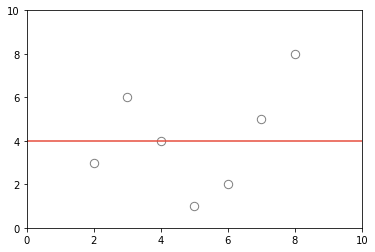

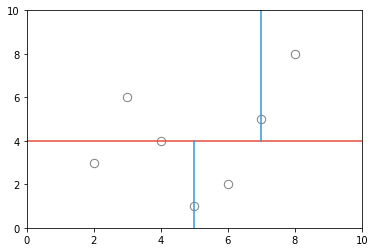

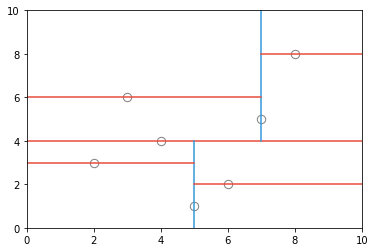

In [24]:
if __name__ == '__main__':
    k1 = kdtree()
    for i in range(3):
        i += 1
        k1.draw(i)